In [1]:
#You are hired by NASA as a Data Scientist, Congratulations!
#your first project;  you have to classify stars based on their astornomical measurements,  0 non-pulsar, 1-pulsar
#luckily astronouts gave  you a dataset after making observations through our Galaxy
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours
#which ML model gives the best?
# Because you are working in NASA, they have very clean dataset(there is no preprocessing for missing or categorical values)
#to learn more about pulsars
#you will find your dataset inside the rar file named as "pulsar_stars.csv"
# https://www.space.com/32661-pulsars.html
#https://en.wikipedia.org/wiki/Pulsar
#https://www.nasa.gov/mission_pages/GLAST/science/neutron_stars.html

# you have binary classification for 2 tasks, heart disease and pulsar star
# you must classifiy healthyVSHeartDisease      and  is it a pulsar star or not

# YOU HAVE ANOTHER VARIATION 
#You are hired by IBM Watson as a Data Scientist, Congratulations!
#Your first project;  you have to classify heart disesae  based on their medical measurements,  0 healthy, 1-heart disease
#your job is to use ML techniques as SVM, logistic regression, Decision_tree, Random_forest and Kneighbours or Xgboost (bonus if you use a Neural Network)
#which ML model gives the best?
# Because you are working in IBM Watson, they have very clean dataset(there is no preprocessing!)
# use HeartDiseaseDataset.csv for this task

#in total you use 2 DATASETS and send me in 1 .ipynb file    good luck!!!!!!
# YOU HAVE 3 WEEKS, UNTIL 20TH OF APRIL
#to learn more about the Heart Disease Dataset :
#  https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# send me only 1 .ipynb file


In [2]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot, transforms
from matplotlib.transforms import Affine2D
from matplotlib.transforms import Affine2D
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

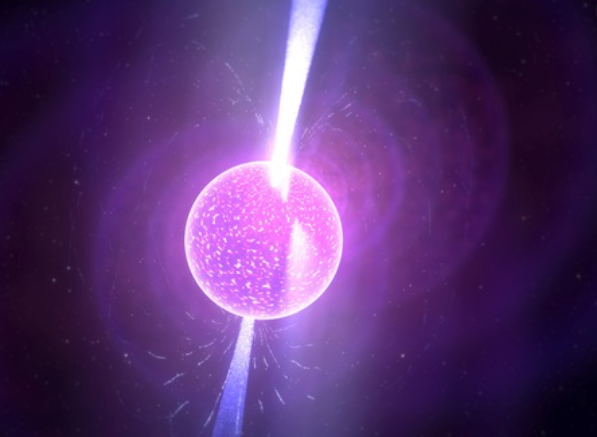

In [3]:
from IPython.display import Image
Image(filename='pulsarstar.png') 

In [4]:
datasetPulsar = pd.read_csv('pulsar_stars.csv')
datasetPulsar.head()

#binary classification for target, pulsar stars can easily give you around 90 acc
# no missing values, no categorical values, just make a ML model and use your knowledge of data visualization
# make proper data analysis, with plotly OR matplotlib, heatmap, boxplot, scatter plots and comparisons, maybe correlation
# get accuracies of different ML algorithms, dont use only 1 algorithm, use at least 3.


,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
print(datasetPulsar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean_of_the_integrated_profile                17898 non-null  float64
 1   Standard_deviation_of_the_integrated_profile  17898 non-null  float64
 2   Excess_kurtosis_of_the_integrated_profile     17898 non-null  float64
 3   Skewness_of_the_integrated_profile            17898 non-null  float64
 4   Mean_of_the_DM_SNR_curve                      17898 non-null  float64
 5   Standard_deviation_of_the_DM_SNR_curve        17898 non-null  float64
 6    Excess_kurtosis_of_the_DM_SNR_curve          17898 non-null  float64
 7    Skewness_of_the_DM_SNR_curve                 17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


In [6]:
#note: target_class is int64 type. Now lets plot and look at our data

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

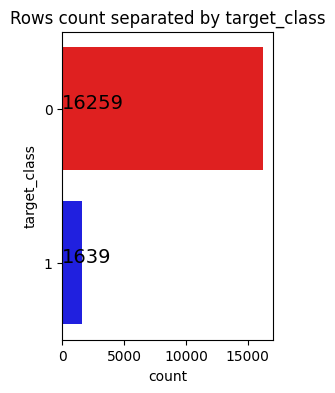

In [7]:
mlist=["red","blue"]

plt.figure(figsize=(6,4))
plt.subplot(121)
a = sns.countplot(y = datasetPulsar["target_class"], linewidth=1, palette=mlist)
for i,j in enumerate(datasetPulsar["target_class"].value_counts().values):
    a.text(.7,i,j,weight = "normal",fontsize = 14)
plt.title("Rows count separated by target_class")
plt.plot

In [8]:
# Here we can see proportion between classes in the dataset, and it's very unbalanced. Thus, i think we can use confusion matrix
# to do some conclusion

In [9]:
data = datasetPulsar.drop(['target_class'], axis=1)
scaler = StandardScaler()
data = scaler.fit_transform(data)
y = datasetPulsar[['target_class']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.20)

In [11]:
#Firstly lets use RandomForestClassifier
rf = RandomForestClassifier()
#here was a error: A column-vector y was passed when a 1d array was expected
rf.fit(X_train, np.ravel(Y_train,order='C'))
rf_pred = rf.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,rf_pred))
print(classification_report(Y_test,rf_pred))

[[3223   20]
 [  49  288]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3243
           1       0.94      0.85      0.89       337

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [13]:
#let's compare with another method - Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
tree_pred = decision_tree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,tree_pred))
print(classification_report(Y_test,tree_pred))

[[3173   70]
 [  62  275]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3243
           1       0.80      0.82      0.81       337

    accuracy                           0.96      3580
   macro avg       0.89      0.90      0.89      3580
weighted avg       0.96      0.96      0.96      3580



In [15]:
#one more - SVM

In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, np.ravel(Y_train,order='C'))
y_pred = svclassifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[3226   17]
 [  59  278]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3243
           1       0.94      0.82      0.88       337

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [18]:
#KNN

In [19]:
KN = KNeighborsClassifier()
KN.fit(X_train, np.ravel(Y_train,order='C'))
KN_pred = KN.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, KN_pred))
print(classification_report(Y_test, KN_pred))

[[3226   17]
 [  56  281]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3243
           1       0.94      0.83      0.89       337

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [21]:
#Non-Linear SVM

In [22]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, np.ravel(Y_train,order='C'))
y2_pred = svclassifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y2_pred))
print(classification_report(Y_test,y2_pred))

[[3225   18]
 [  75  262]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3243
           1       0.94      0.78      0.85       337

    accuracy                           0.97      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.97      0.97      0.97      3580



In [24]:
#Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression() 
regr.fit(X_train, np.ravel(Y_train,order='C'))
Log_pred = regr.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Log_pred))
print(classification_report(Y_test, Log_pred))

[[3226   17]
 [  64  273]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3243
           1       0.94      0.81      0.87       337

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [27]:
print("Decision Tree: %.2f" % round(accuracy_score(Y_test, tree_pred)*100, 2), '%')
print('Random Forest:', round(accuracy_score(Y_test, rf_pred)*100, 2) , '%')
print('KNeighbors:', round(accuracy_score(Y_test, KN_pred)*100, 2), '%')
print('SVM:', round(accuracy_score(Y_test, y_pred)*100, 2), '%')
print('Non-Linear SVM', round(accuracy_score(Y_test, y2_pred)*100, 2), '%')
print('Log Ress', round(accuracy_score(Y_test, Log_pred)*100, 2), '%')

Decision Tree: 96.31 %
Random Forest: 98.07 %
KNeighbors: 97.96 %
SVM: 97.88 %
Non-Linear SVM 97.4 %
Log Ress 97.74 %


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(4, input_shape=(8,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
history = model.fit(X_train, Y_train, validation_data=(X_train, Y_train), epochs=100, batch_size=96, callbacks=[callback])

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0911 - loss: 1.3404 - val_accuracy: 0.0909 - val_loss: 1.0716
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0932 - loss: 1.0051 - val_accuracy: 0.0909 - val_loss: 0.8382
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1168 - loss: 0.7993 - val_accuracy: 0.6886 - val_loss: 0.6830
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.6510 - val_accuracy: 0.9133 - val_loss: 0.5649
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9216 - loss: 0.5398 - val_accuracy: 0.9402 - val_loss: 0.4749
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9327 - loss: 0.4558 - val_accuracy: 0.9091 - val_loss: 0.4063
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.3907 - val_accuracy: 0.9091 - val_loss: 0.3525
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.3429 - val_accu

In [31]:
def plot_accuracy_loss(history):
    fig=plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_acc')
    plt.title('train_acc VS val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend(fontsize = "large")

    
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
    plt.title('train_loss VS val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend()

    
    plt.show()

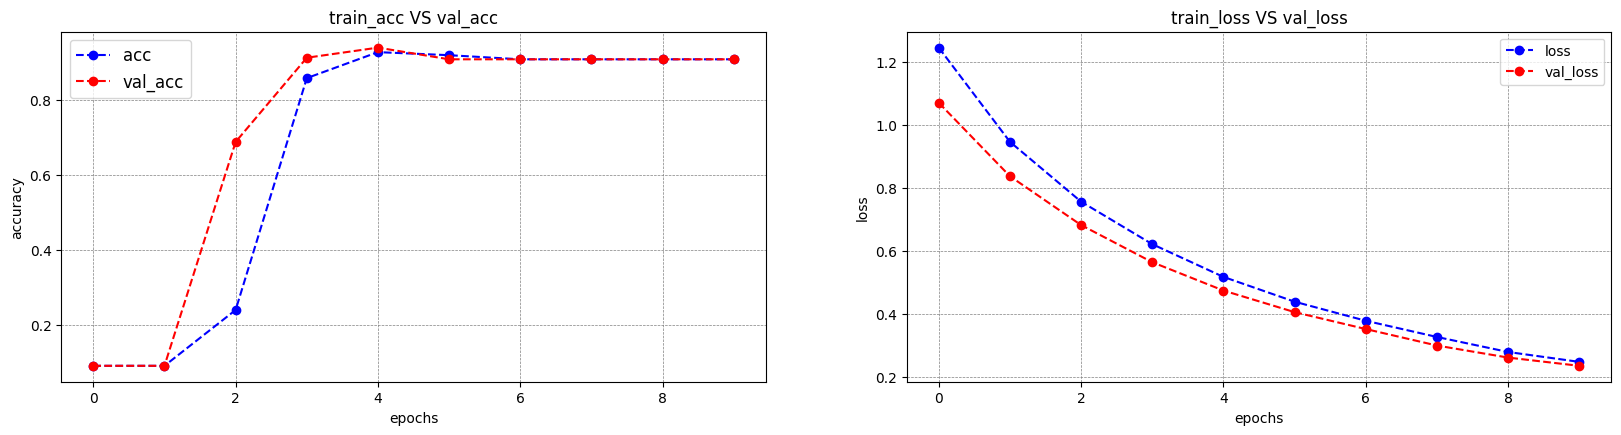

In [32]:
plot_accuracy_loss(history)

In [33]:
len(history.history['accuracy'])  

10

In [36]:
#it took 9 epochs to get patient accuracy >95%, and now we have Neural network well prepared to predict target class

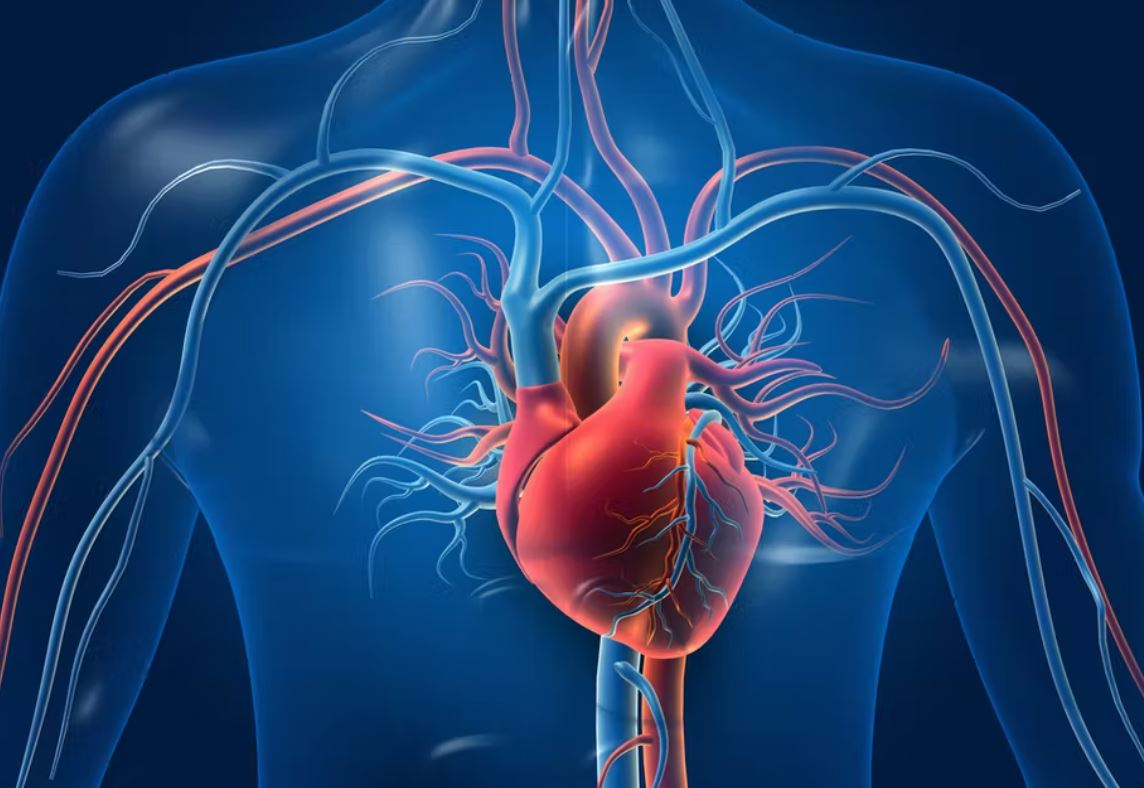

In [37]:
from IPython.display import Image
Image(filename='heart.jpg') 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
datasetHeart = pd.read_csv('HeartDiseaseDataset.csv') # you will not receive very high accuracy 
datasetHeart.head()
#binary classification for target
#https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00524-9
#https://archive.ics.uci.edu/ml/datasets/heart+disease
# no missing values, no categorical values, just make a ML model and use your knowledge of data visualization
# get accuracies of different ML algorithms, dont use only 1 algorithm, use at least 3.
# you can get around max 80 percent accuracy which is very OK

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
print(datasetHeart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

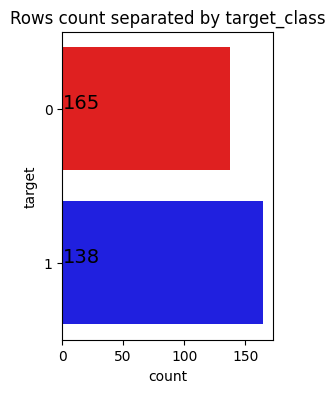

In [40]:
mlist=["red","blue"]

plt.figure(figsize=(6,4))
plt.subplot(121)
a = sns.countplot(y = datasetHeart["target"], linewidth=1, palette=mlist)
for i,j in enumerate(datasetHeart["target"].value_counts().values):
    a.text(.7,i,j,weight = "normal",fontsize = 14)
plt.title("Rows count separated by target_class")
plt.plot

In [41]:
#as we can see dataset target values well balanced

In [42]:
data = datasetHeart.drop(['target'], axis=1)
scaler = StandardScaler()
data = scaler.fit_transform(data)
y = datasetHeart[['target']]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.20)

In [44]:
#Firstly lets use RandomForestClassifier
rf = RandomForestClassifier()
#here was a error: A column-vector y was passed when a 1d array was expected
rf.fit(X_train, np.ravel(Y_train,order='C'))
rf_pred = rf.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,rf_pred))
print(classification_report(Y_test,rf_pred))

[[21  9]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [46]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
tree_pred = decision_tree.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,tree_pred))
print(classification_report(Y_test,tree_pred))

[[25  5]
 [ 8 23]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.82      0.74      0.78        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [48]:
#SVM

In [49]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, np.ravel(Y_train,order='C'))
y_pred = svclassifier.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[20 10]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.74      0.90      0.81        31

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



In [51]:
#KNN

In [52]:
KN = KNeighborsClassifier()
KN.fit(X_train, np.ravel(Y_train,order='C'))
KN_pred = KN.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, KN_pred))
print(classification_report(Y_test, KN_pred))

[[23  7]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [54]:
#Non-Linear SVM

In [55]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, np.ravel(Y_train,order='C'))
y2_pred = svclassifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y2_pred))
print(classification_report(Y_test,y2_pred))

[[20 10]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.74      0.90      0.81        31

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



In [57]:
#Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression() 
regr.fit(X_train, np.ravel(Y_train,order='C'))
Log_pred = regr.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Log_pred))
print(classification_report(Y_test, Log_pred))

[[20 10]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [60]:
print("Decision Tree: %.2f" % round(accuracy_score(Y_test, tree_pred)*100, 2), '%')
print('Random Forest:', round(accuracy_score(Y_test, rf_pred)*100, 2) , '%')
print('KNeighbors:', round(accuracy_score(Y_test, KN_pred)*100, 2), '%')
print('SVM:', round(accuracy_score(Y_test, y_pred)*100, 2), '%')
print('Non-Linear SVM', round(accuracy_score(Y_test, y2_pred)*100, 2), '%')
print('Log Ress', round(accuracy_score(Y_test, Log_pred)*100, 2), '%')

Decision Tree: 78.69 %
Random Forest: 78.69 %
KNeighbors: 81.97 %
SVM: 78.69 %
Non-Linear SVM 78.69 %
Log Ress 77.05 %


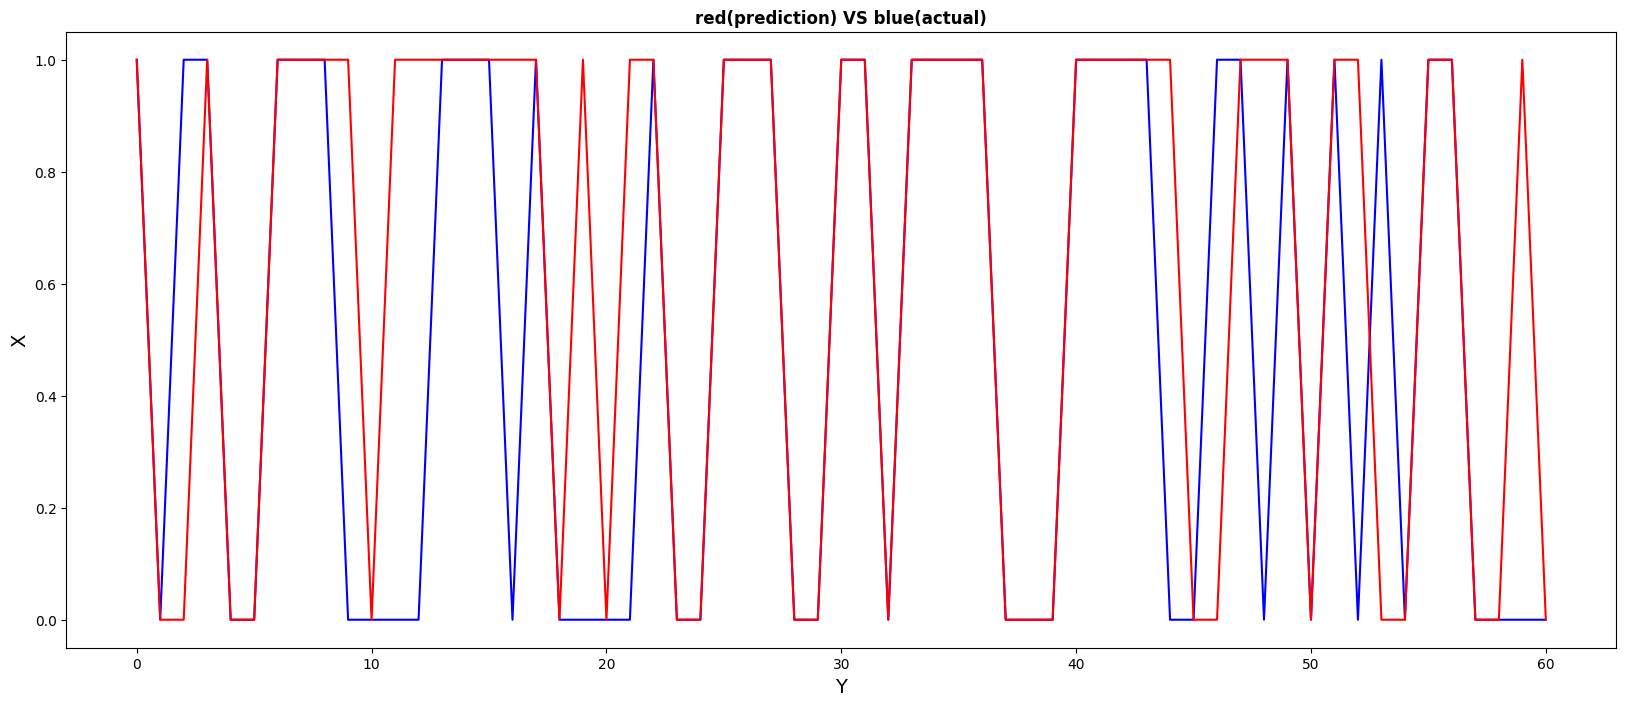

In [61]:
#SVM results looks better then others
plt.figure(figsize=(20,8))
plt.plot(Y_test.to_numpy(dtype=object)[:140], color='blue')
plt.plot(y_pred[:140], color='red')
plt.title('red(prediction) VS blue(actual)', fontsize=12, fontweight='bold')
plt.xlabel("Y", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.show()